# Imports

`numpy`      package for array handling  
`pandas`     import to create and modify dataframes     
`matplotlib` package for data visulization  
`seaborn`    build on matploblib, higher level graph functions

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data
Here we are taking the inbuilt function of keras to load the data from the server  
The dataset file in present in the [Link to dataset in amazon server](https://s3.amazonaws.com/text-datasets/reuters.npz)  
The inbuilt code 
```python
def load_data(path='reuters.npz', num_words=None, skip_top=0,
              maxlen=None, test_split=0.2, seed=113,
              start_char=1, oov_char=2, index_from=3, **kwargs):
    """Loads the Reuters newswire classification dataset.
    # Arguments
        path: where to cache the data (relative to `~/.keras/dataset`).
        num_words: max number of words to include. Words are ranked
            by how often they occur (in the training set) and only
            the most frequent words are kept
        skip_top: skip the top N most frequently occurring words
            (which may not be informative).
        maxlen: truncate sequences after this length.
        test_split: Fraction of the dataset to be used as test data.
        seed: random seed for sample shuffling.
        start_char: The start of a sequence will be marked with this character.
            Set to 1 because 0 is usually the padding character.
        oov_char: words that were cut out because of the `num_words`
            or `skip_top` limit will be replaced with this character.
        index_from: index actual words with this index and higher.
    # Returns
        Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
    Note that the 'out of vocabulary' character is only used for
    words that were present in the training set but are not included
    because they're not making the `num_words` cut here.
    Words that were not seen in the training set but are in the test set
    have simply been skipped.
    """
    # Legacy support
    if 'nb_words' in kwargs:
        warnings.warn('The `nb_words` argument in `load_data` '
                      'has been renamed `num_words`.')
        num_words = kwargs.pop('nb_words')
    if kwargs:
        raise TypeError('Unrecognized keyword arguments: ' + str(kwargs))

    path = get_file(path,
                    origin='https://s3.amazonaws.com/text-datasets/reuters.npz',
                    file_hash='87aedbeb0cb229e378797a632c1997b6')
    with np.load(path) as f:
        xs, labels = f['x'], f['y']

    np.random.seed(seed)
    indices = np.arange(len(xs))
    np.random.shuffle(indices)
    xs = xs[indices]
    labels = labels[indices]

    if start_char is not None:
        xs = [[start_char] + [w + index_from for w in x] for x in xs]
    elif index_from:
        xs = [[w + index_from for w in x] for x in xs]

    if maxlen:
        xs, labels = _remove_long_seq(maxlen, xs, labels)

    if not num_words:
        num_words = max([max(x) for x in xs])

    # by convention, use 2 as OOV word
    # reserve 'index_from' (=3 by default) characters:
    # 0 (padding), 1 (start), 2 (OOV)
    if oov_char is not None:
        xs = [[w if skip_top <= w < num_words else oov_char for w in x] for x in xs]
    else:
        xs = [[w for w in x if skip_top <= w < num_words] for x in xs]

    idx = int(len(xs) * (1 - test_split))
    x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
    x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])

    return (x_train, y_train), (x_test, y_test)


def get_word_index(path='reuters_word_index.json'):
    """Retrieves the dictionary mapping words to word indices.
    # Arguments
        path: where to cache the data (relative to `~/.keras/dataset`).
    # Returns
        The word index dictionary.
    """
    path = get_file(
        path,
        origin='https://s3.amazonaws.com/text-datasets/reuters_word_index.json',
        file_hash='4d44cc38712099c9e383dc6e5f11a921')
    f = open(path)
    data = json.load(f)
    f.close()
    return data
```
## Regarding Dataset
This dataset contains of newswires from retuers of 46 different classes. The number of samples are 11,228.

[official Link](https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection)   


In [2]:
# Loading the data
from keras.datasets import reuters
(x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.npz",num_words=10000,skip_top=0,maxlen=None,test_split=0.2,seed=113,start_char=1,oov_char=2,index_from=3)


Using TensorFlow backend.


# Understand the dataset
Let see the size and shape of test and training tuples

``On Execution``  
There will be 8982 samples of word embeddings list in training set  
There will be 2246 samples of word embeddings list in testing set

In [3]:
# Understanding the data
print("The number of training samples",len(x_train))
print("The number of testing samples",len(x_test))
print("The shape of training samples array",np.shape(x_train))
print("The shape of training samples labels", np.shape(y_train))
print("First element in x_train ,its type :",type(x_train[0]),"it's shape :",np.shape(x_train[0]))

The number of training samples 8982
The number of testing samples 2246
The shape of training samples array (8982,)
The shape of training samples labels (8982,)
First element in x_train ,its type : <class 'list'> it's shape : (87,)


# Visualizing the data
Let us try to visualise the few samples of data so, we could get an idea of how the data looks like  
`On Execution`  
We can see first two newswires. 
> Note: on loading the dataset we load the word embedding, to convert into the actual newswires we take the help of word to index dictonary to convert the given words embedding to actual news writings.

In [4]:
# Data Visulization

# A dictionary mapping words to an integer index
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # Reversed dictionary

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

## Viewing the review's
print('\nFirst Review \n')
print(decode_review(x_train[0]))
print('\nIts label :',y_train[0])

print('\nSecond Review \n')
print(decode_review(x_train[1]))
print('\nIts label :',y_train[1])
 


First Review 

the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs

Its label : 3

Second Review 

the termination payment airport takes 6 of geological 3 6 602 begin up said fully bank expects commodity total is giant a of this takes of series termination payment airport mln a for capital 1 pre 50 american east said in council takes of of france a but u any 4 s 1st losses pct dlrs

Its label : 4


# Preprocessing the data

## Padding
Each newswire in the dataset would have a different size but, in a neural network model would like to have all its inputs of same size for that we all padding to the reviews.  
We make sure all the embeddings have the same length of max lenght i.e. 256 (for this dataset).   
For embeddings longer than 256 the enddings will be chopped off.   
For embeddings shorter than 256 '0' (zeros) would be 
> Note: On adding 0 to the embeddings we are not creating a new word in the embedding. The dataset doesn't assign any word to the value 0 . 0 is some kind of unknown word which we use as padding.

In [5]:
# Data Preprocessing

##Varibles
classes = 46

## Padding
from keras.preprocessing.sequence import pad_sequences
x_train_padded = pad_sequences(x_train,value=0,padding='post',maxlen=256)
x_test_padded =  pad_sequences(x_test,value=0,padding='post',maxlen=256)

## Creating sparse vector representation
from keras.utils import to_categorical
y_train_sparse = to_categorical(y_train,num_classes=classes)
y_test_sparse = to_categorical(y_test,num_classes=classes)

# Training varibles
These Training varbles are hyper parameters for neural network training.   
`epochs` : each epoch is forward propagation + backward propagation over the whole dataset once is called one epoch.  
`learning_rate` : the magnitude in which the weights are modified one the acquired loss.   
`learning_rate_decay` : there can be high leanring rate at the beining of the training when the loss is high. Over a period of time the learning rate can reduce for fine training of network.  
`batch_size` : the data is fed to the network in batches of 32 samples at each time. This batch feeding is done all over the whole dataset.  
`vocab_size` : vocab size is the total number of words present in the dictonary. This size would represent the input size to the nural network model

In [6]:
# Training varibles
learning_rate = 0.0005
learning_rate_decay = 0.00001
batch_size = 512
epochs = 30

# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

# Neural Netowork Model
`Line 6` : we are building a keras sequential model  
`Line 17` : we are using stochastic gradient decent optimizer  
`Line 19` : compiling the model to check if the model is build properly.  

The loss function being used is `categorical_crossentropy` since its a multi class classification    
`model.summary()` would just describe the layers in the model.

In [7]:
# Building the model

from keras.models import Sequential
from keras.layers import Embedding,GlobalAveragePooling1D,Dense,Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(Embedding(vocab_size, 512))
model.add(GlobalAveragePooling1D())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(46, activation = 'sigmoid'))

model.summary()

# optimizer
optimizer = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=learning_rate_decay, amsgrad=False)

# Model Compilation
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 512)         5120000   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 46)                11822     
Total params: 5,263,150
Trainable params: 5,263,150
Non-trainable params: 0
_________________________________________________________________


# Training 
Training is the process of feeding the data to neural network and modifiying the weights of the model using the the backpropagation algorithm. The backpropagation using loss the function acquires the loss over batch size of data and does a backpropagation to modify the weights in such a way the in the next epoch the loss would be less when compared to the current epoch

In [8]:
# Training the model
model_history = model.fit(x_train_padded,y_train_sparse,epochs=epochs,batch_size=batch_size,validation_data=(x_test_padded, y_test_sparse),verbose=1)

Train on 8982 samples, validate on 2246 samples
Epoch 1/30
8982/8982 [==============================] - 7s 740us/step - loss: 3.7463 - acc: 0.3317 - val_loss: 3.6337 - val_acc: 0.3785
Epoch 2/30
8982/8982 [==============================] - 2s 193us/step - loss: 3.4892 - acc: 0.3640 - val_loss: 3.2866 - val_acc: 0.3798
Epoch 3/30
8982/8982 [==============================] - 2s 193us/step - loss: 3.0467 - acc: 0.3511 - val_loss: 2.7812 - val_acc: 0.3882
Epoch 4/30
8982/8982 [==============================] - 2s 193us/step - loss: 2.6398 - acc: 0.3090 - val_loss: 2.5533 - val_acc: 0.3838
Epoch 5/30
8982/8982 [==============================] - 2s 193us/step - loss: 2.4621 - acc: 0.3210 - val_loss: 2.3713 - val_acc: 0.3629
Epoch 6/30
8982/8982 [==============================] - 2s 193us/step - loss: 2.3571 - acc: 0.3437 - val_loss: 2.3178 - val_acc: 0.3624
Epoch 7/30
8982/8982 [==============================] - 2s 193us/step - loss: 2.3186 - acc: 0.3415 - val_loss: 2.2884 - val_acc: 0.3758


# Results
using the trained model we try to predict what are the catogories of newswires in the test set

In [9]:
# Results
y_pred = model.predict(x_test_padded)

# Visulizing the results
checking the results by visulizing them and creating a confusion matrix. The values of precession and accuracy can be obtained by the help of confusion matrix and f1 scores to compare this architecure with other architectures of neural networks

Predicted  1    3    4   8   9   10  11  13  16  18   19  20  21  25  30
Actual                                                                  
0           5    0    1   0   5   0   0   0   0   0    0   0   1   0   0
1          88    3    8   0   1   0   3   0   1   1    0   0   0   0   0
2          16    0    0   0   1   0   2   1   0   0    0   0   0   0   0
3           5  763   35   1   0   0   1   1   2   0    4   0   1   0   0
4           4   17  434   0   0   0   5   3   6   0    4   1   0   0   0
5           5    0    0   0   0   0   0   0   0   0    0   0   0   0   0
6           0    1    3   0   1   0   0   1   1   1    0   0   0   6   0
7           0    1    0   1   0   0   0   0   0   1    0   0   0   0   0
8           0    9    3  15   1   0   0   0   0   0    8   2   0   0   0
9           8    0    2   1  12   0   1   1   0   0    0   0   0   0   0
10         25    1    1   0   0   1   1   1   0   0    0   0   0   0   0
11          7    2    6   0   0   0  59   1   0   0

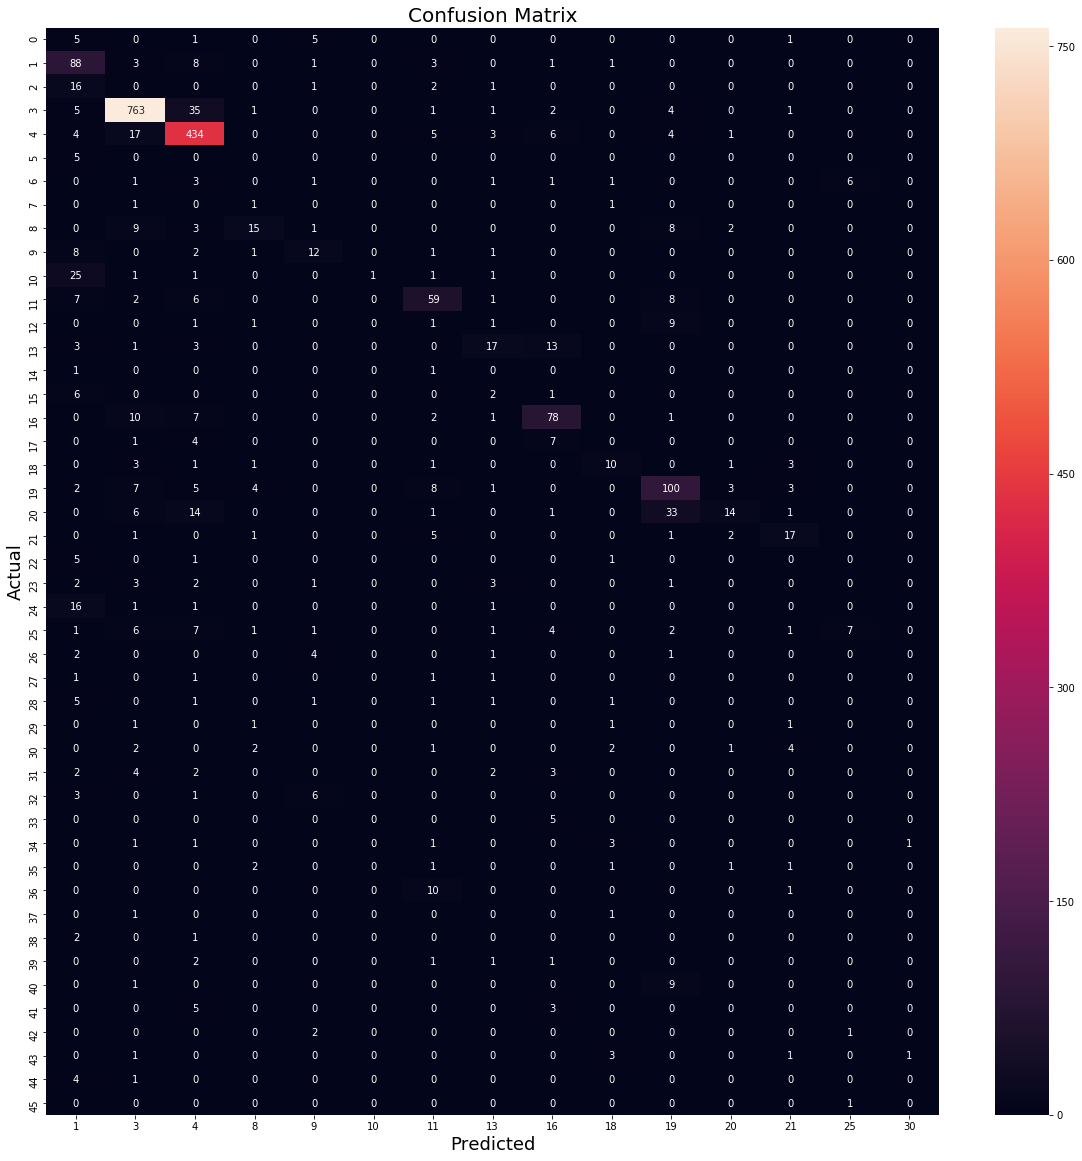

In [10]:
# Visulizing the results
y_pred = np.argmax(y_pred,axis=1)
y_pred = pd.Series(y_pred, name='Predicted')
y_test = pd.Series(y_test, name='Actual')
df_confusion  = pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'])
print(df_confusion)
plt.figure(figsize = (20,20))
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.title('Confusion Matrix',fontsize=20)
sns.heatmap(df_confusion, annot=True,fmt="d")